In [1]:
# import libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import glob

print ('libraries imported')

libraries imported


In [2]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_ann"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_abrupt4xCO2_pr_spatialmean_ann.nc',
 'PMIP3_lgm_pr_spatialmean_ann.nc',
 'PMIP4_historical_pr_spatialmean_ann.nc',
 'PMIP4_lgm_pr_spatialmean_ann.nc',
 'PMIP3_midHolocene_pr_spatialmean_ann.nc',
 'PMIP3_lig127k_pr_spatialmean_ann.nc',
 'PMIP3_historical_pr_spatialmean_ann.nc',
 'PMIP4_lig127k_pr_spatialmean_ann.nc',
 'PMIP3_observations_pr_spatialmean_ann.nc',
 'PMIP3_midPliocene-eoi400_pr_spatialmean_ann.nc',
 'PMIP4_piControl_pr_spatialmean_ann.nc',
 'PMIP3_abrupt4xCO2_pr_spatialmean_ann.nc',
 'PMIP3_1pctCO2_pr_spatialmean_ann.nc',
 'PMIP4_midPliocene-eoi400_pr_spatialmean_ann.nc',
 'PMIP4_1pctCO2_pr_spatialmean_ann.nc',
 'PMIP4_midHolocene_pr_spatialmean_ann.nc',
 'PMIP4_observations_pr_spatialmean_ann.nc']

In [3]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('BrBG') #define colour map
    clim=[-1.5,1.5]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 30] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
    plt.colorbar(fig,cax=cax, extend='both', **kw)
    ax.text(0.5, 1.0225, filename, va='bottom', ha='center', 
        rotation='horizontal', rotation_mode='anchor', fontweight='bold', fontsize='14',
        transform=ax.transAxes)
    ax.text(0.5, -0.25, 'Mean Annual Precipitation (mm $day^{-1}$ $^\circ$$C^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)   
    plt.savefig(filename)

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: Use

masked_array(
  data=[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],
  mask=False,
  fill_value=1e+20)

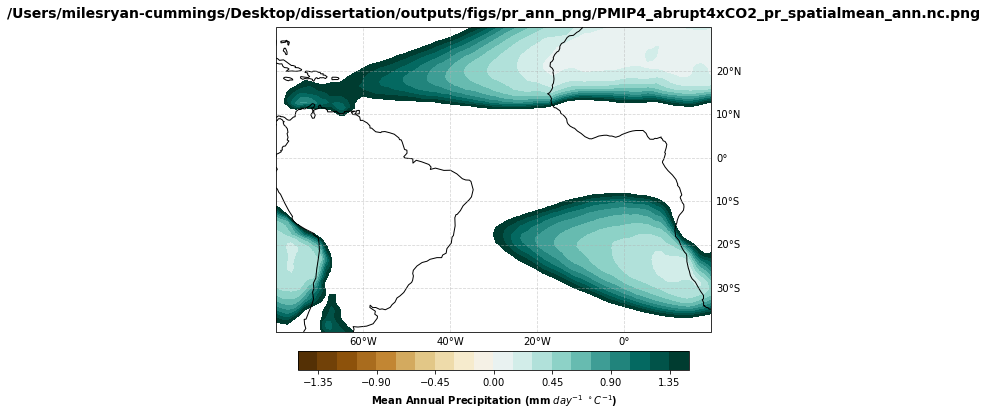

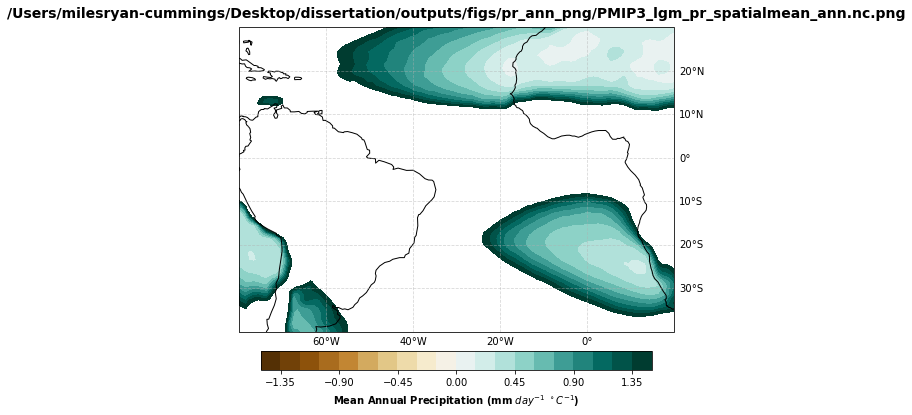

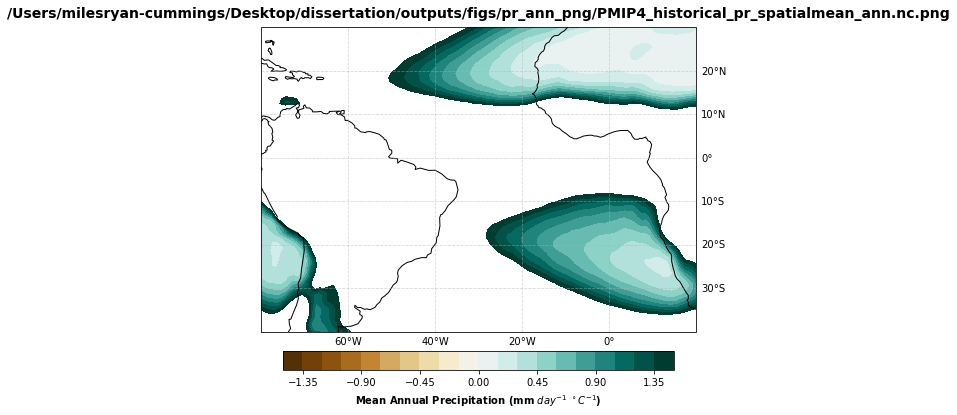

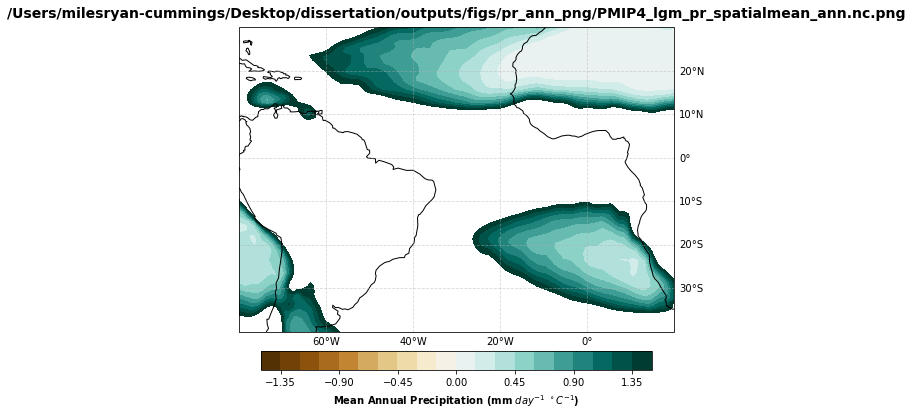

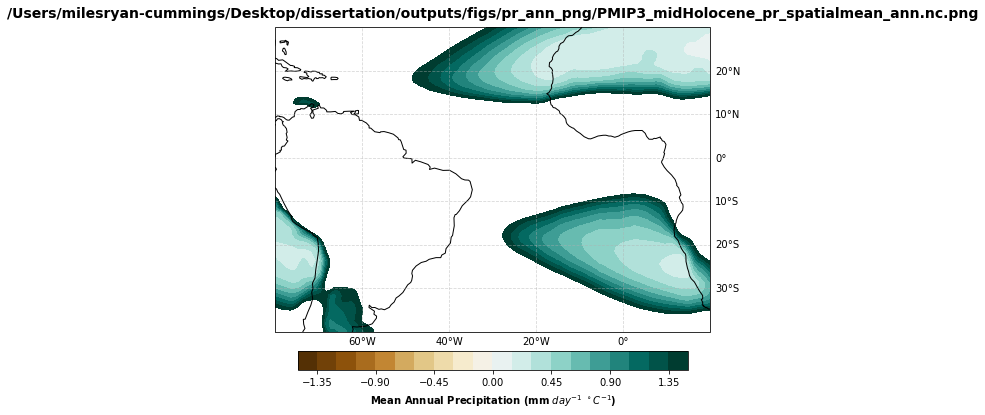

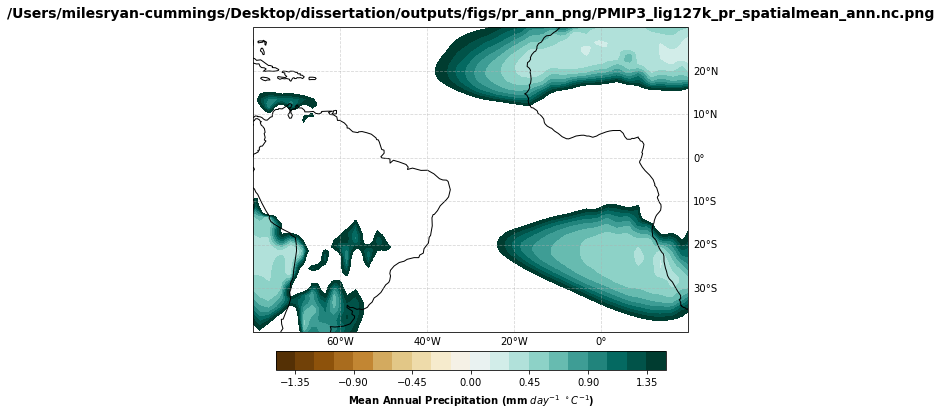

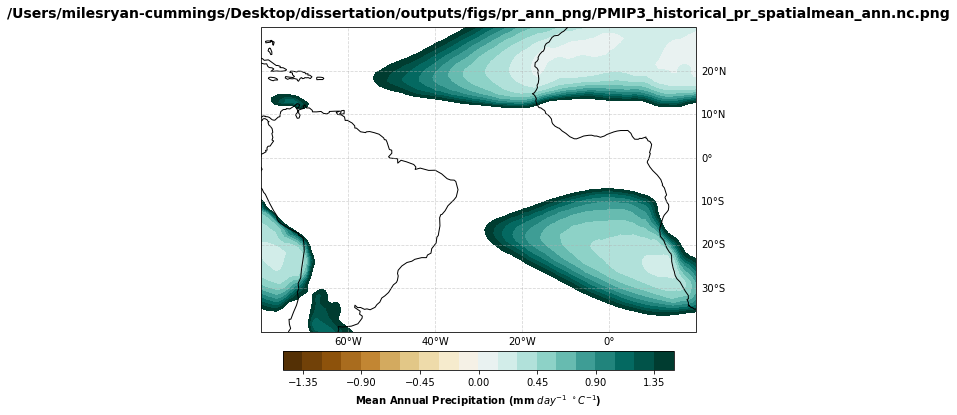

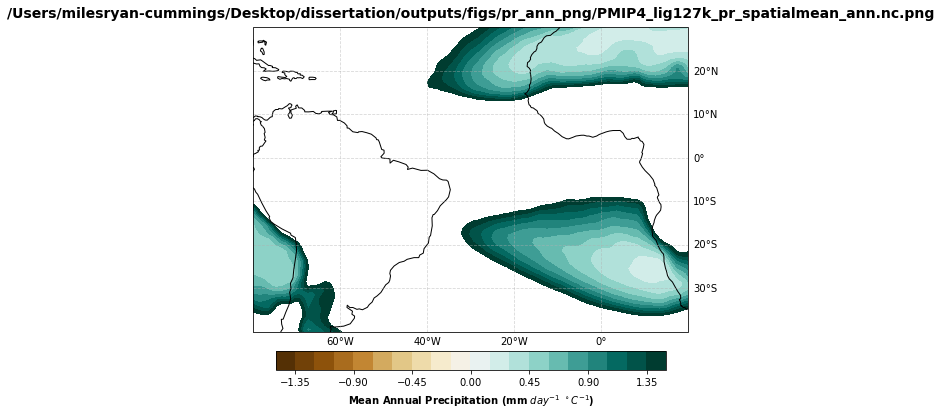

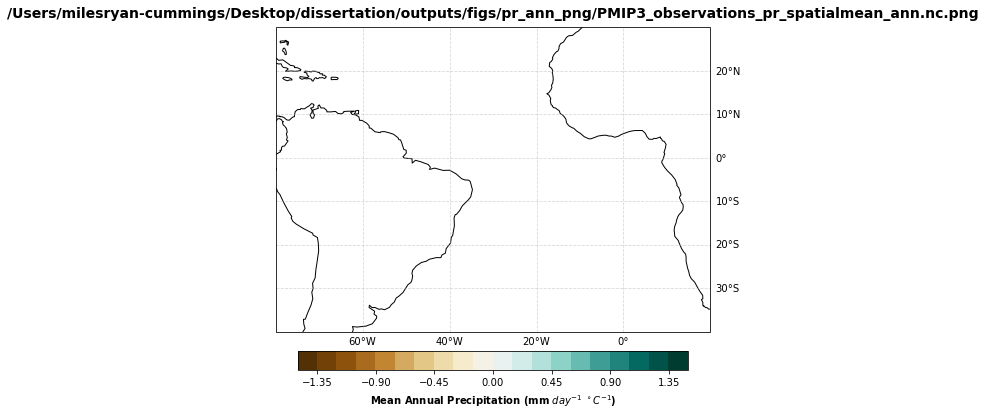

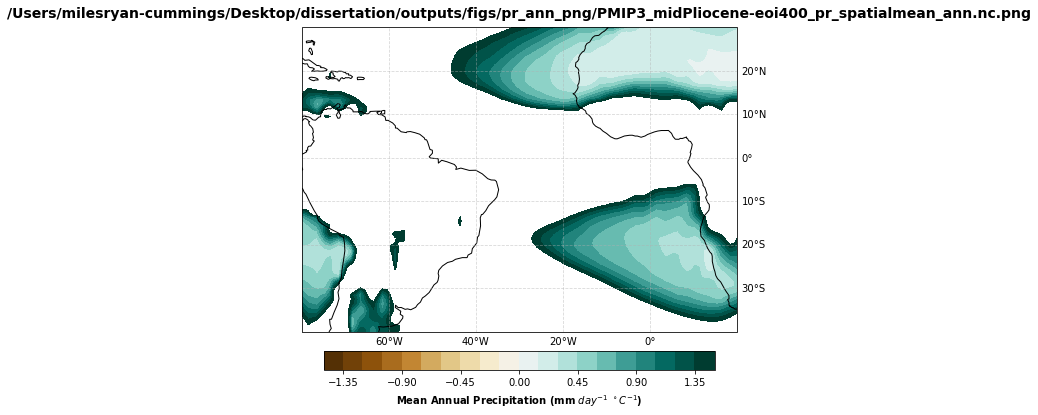

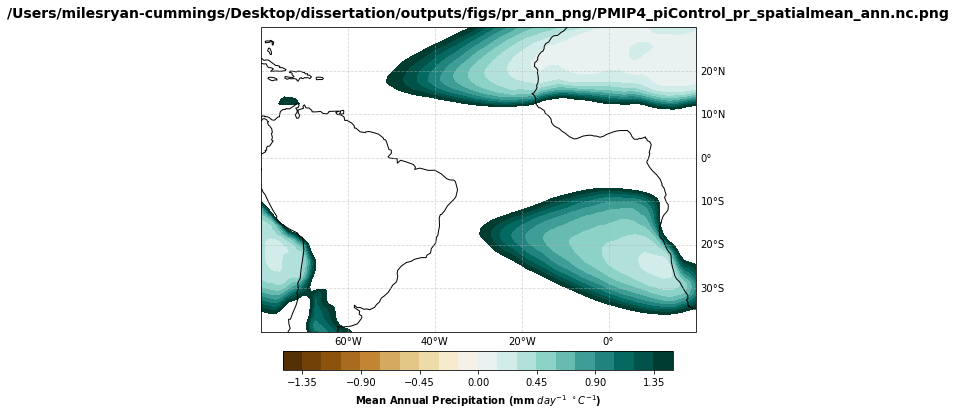

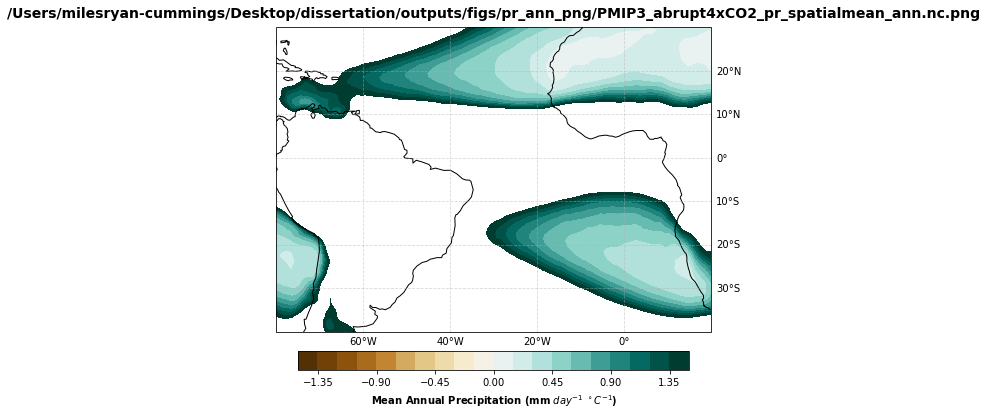

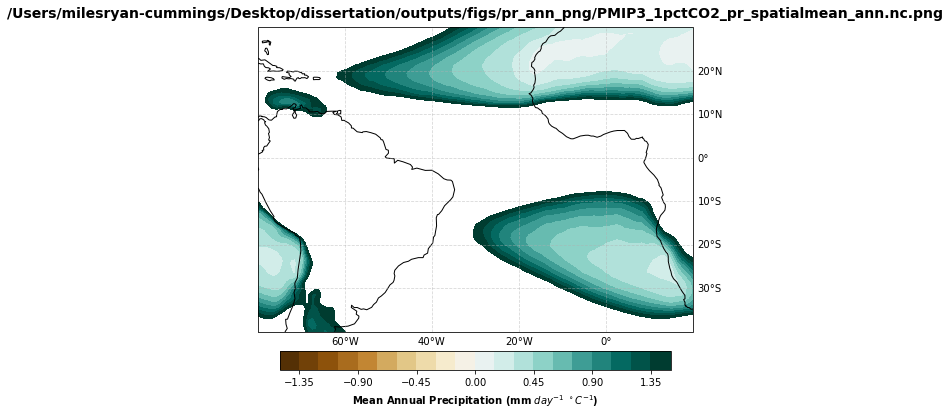

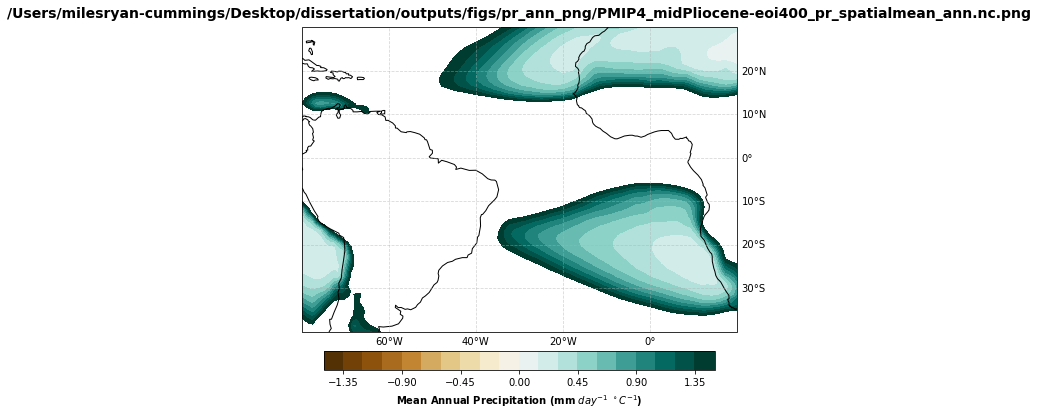

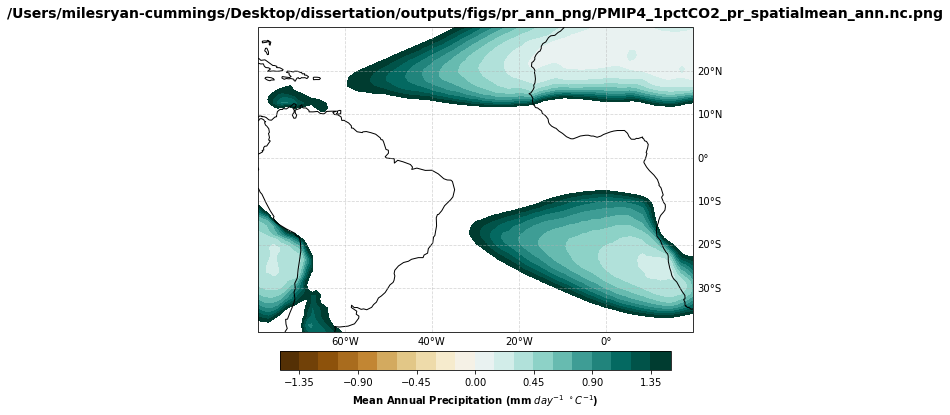

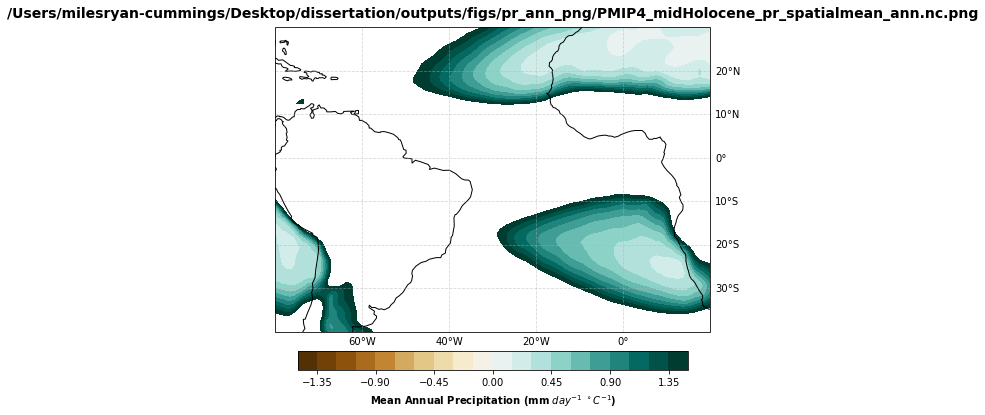

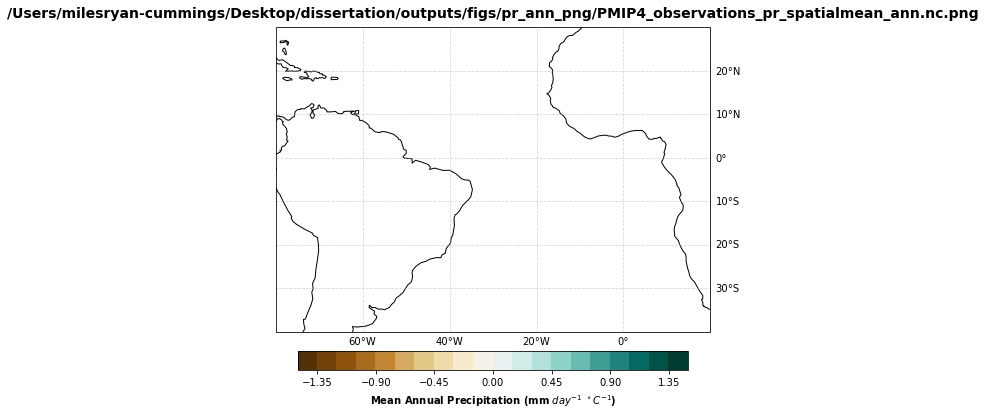

In [4]:
#open datasets
variable_name= 'pr_spatialmean_ann'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_ann/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/pr_ann_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot



In [5]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_djf"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP3_piControl_pr_spatialmean_djf.nc',
 'PMIP3_lgm_pr_spatialmean_djf.nc',
 'PMIP4_abrupt4xCO2_pr_spatialmean_djf.nc',
 'PMIP4_historical_pr_spatialmean_djf.nc',
 'PMIP4_lgm_pr_spatialmean_djf.nc',
 'PMIP3_lig127k_pr_spatialmean_djf.nc',
 'PMIP3_midHolocene_pr_spatialmean_djf.nc',
 'PMIP3_historical_pr_spatialmean_djf.nc',
 'PMIP4_lig127k_pr_spatialmean_djf.nc',
 'PMIP3_observations_pr_spatialmean_djf.nc',
 'PMIP3_midPliocene-eoi400_pr_spatialmean_djf.nc',
 'PMIP4_piControl_pr_spatialmean_djf.nc',
 'PMIP3_abrupt4xCO2_pr_spatialmean_djf.nc',
 'PMIP3_1pctCO2_pr_spatialmean_djf.nc',
 'PMIP4_1pctCO2_pr_spatialmean_djf.nc',
 'PMIP4_midPliocene-eoi400_pr_spatialmean_djf.nc',
 'PMIP4_observations_pr_spatialmean_djf.nc',
 'PMIP4_midHolocene_pr_spatialmean_djf.nc']

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: Use

masked_array(
  data=[[0.19047507, 0.18991212, 0.18941804, ..., 0.19076081, 0.19075187,
         0.19047507],
        [0.22792798, 0.2272996 , 0.22707143, ..., 0.22725764, 0.22792081,
         0.22792798],
        [0.29562025, 0.29897109, 0.30327351, ..., 0.28738537, 0.2917866 ,
         0.29562025],
        ...,
        [0.31624186, 0.31630506, 0.31638511, ..., 0.31644182, 0.31629661,
         0.31624186],
        [0.31553998, 0.3155745 , 0.3156244 , ..., 0.31577277, 0.31561183,
         0.31553998],
        [0.30461194, 0.30462119, 0.30463298, ..., 0.30471744, 0.30464523,
         0.30461194]],
  mask=False,
  fill_value=1e+20)

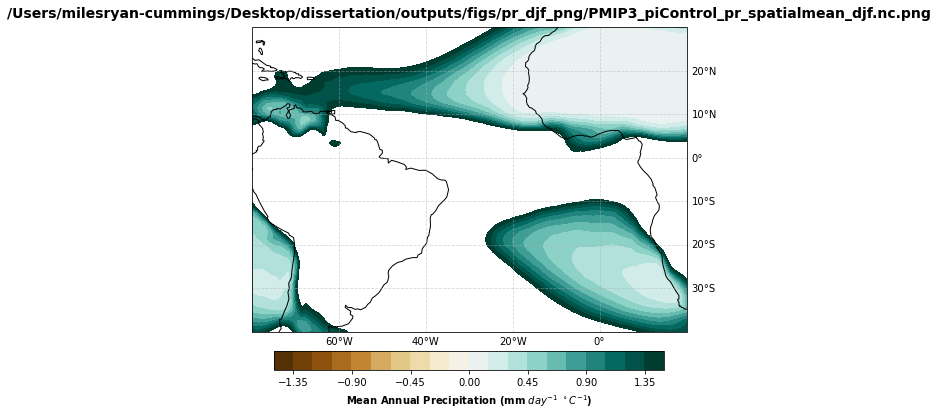

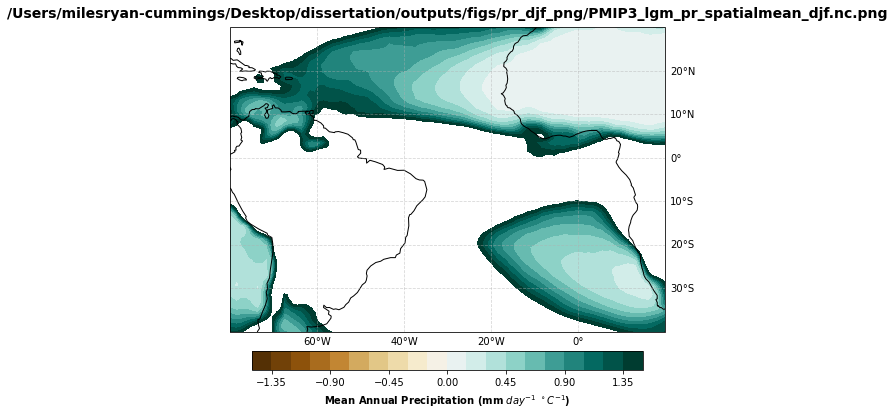

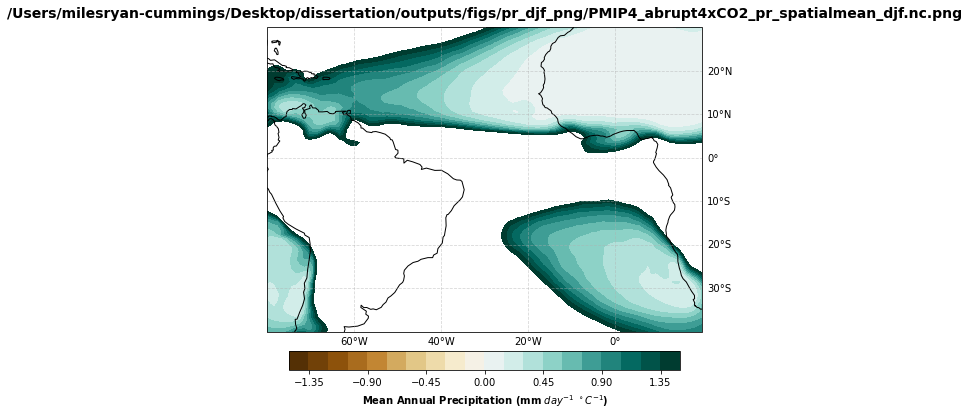

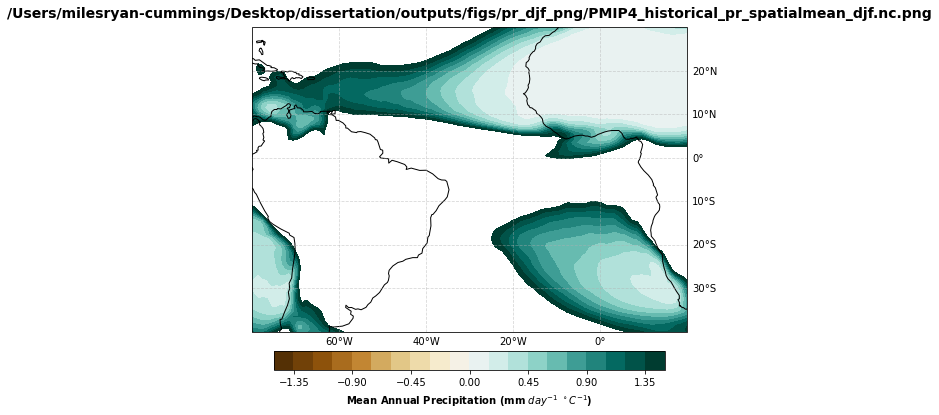

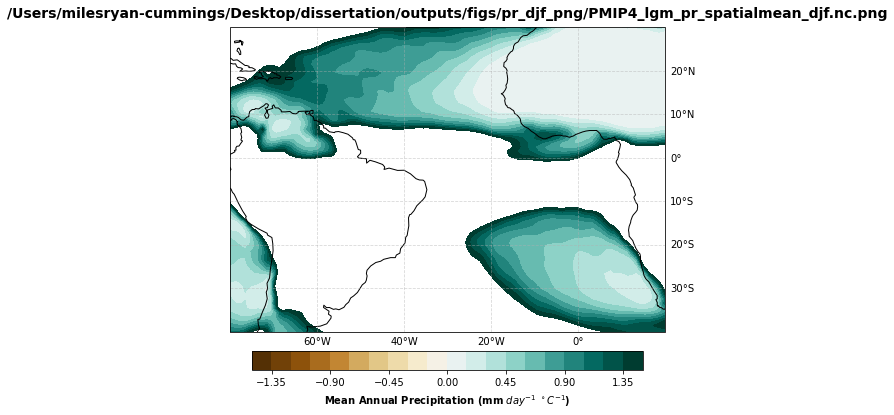

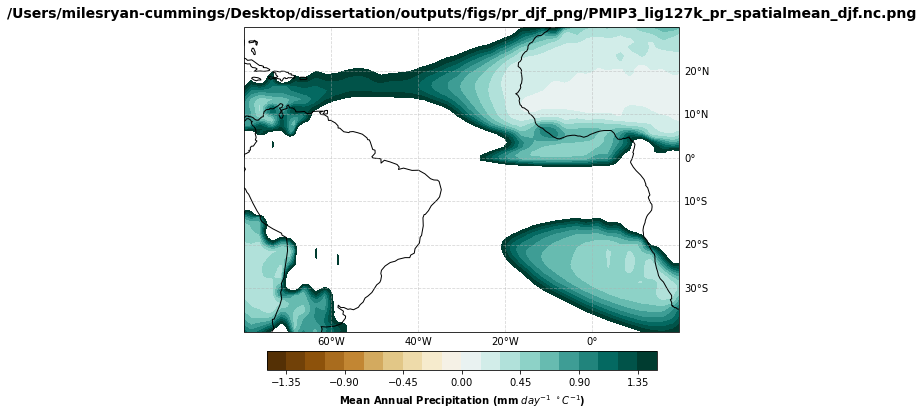

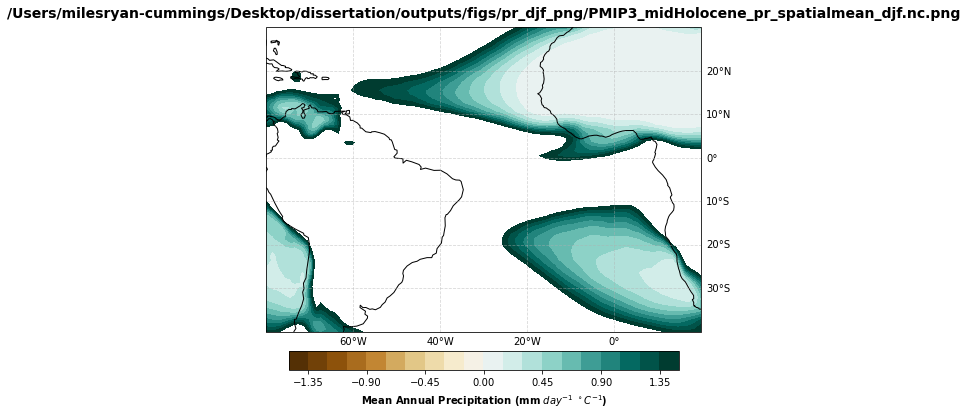

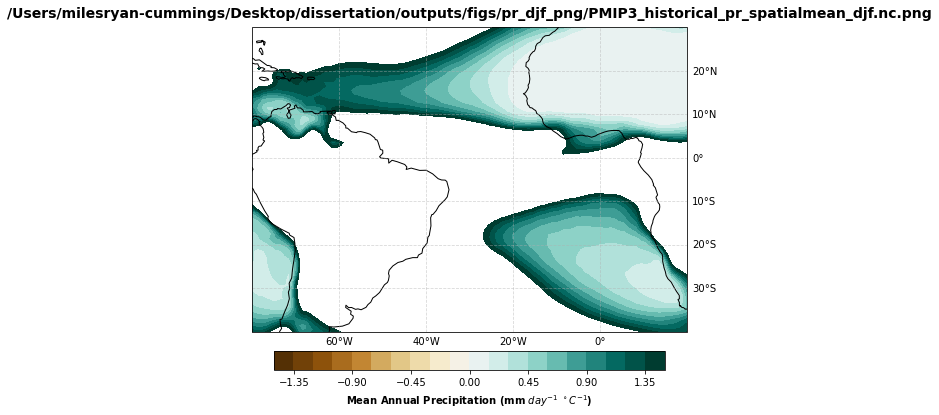

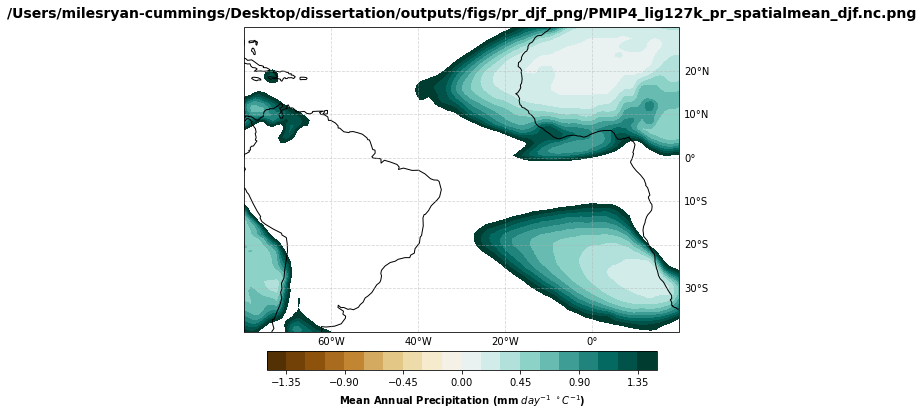

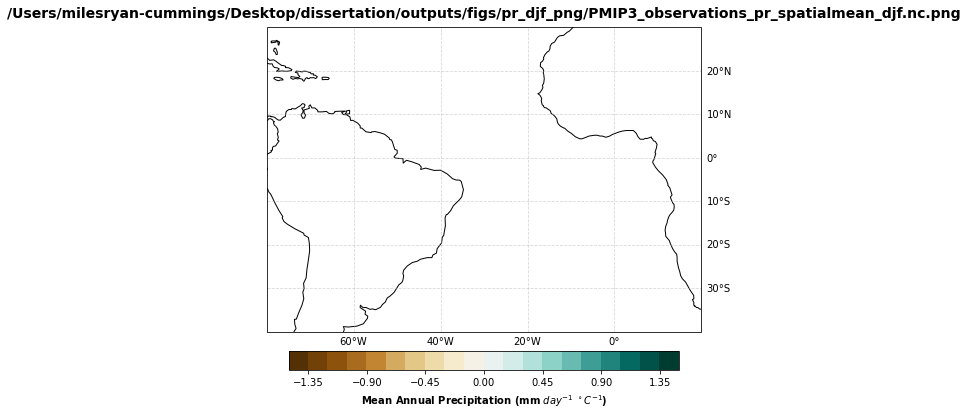

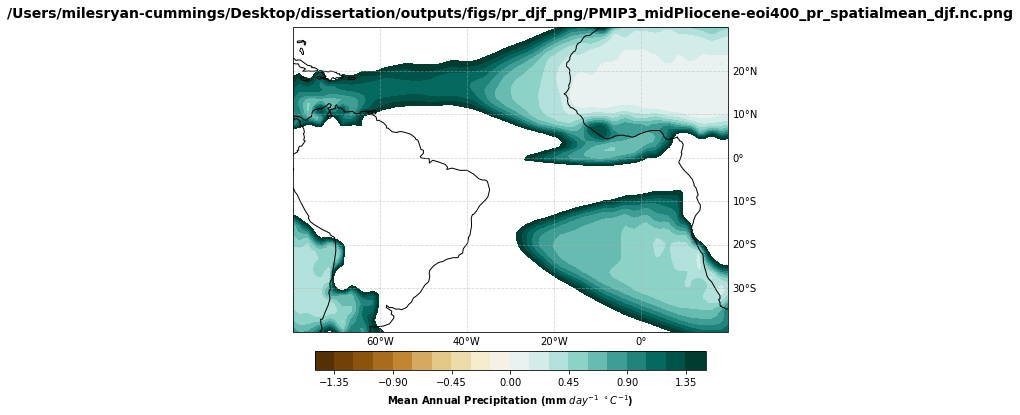

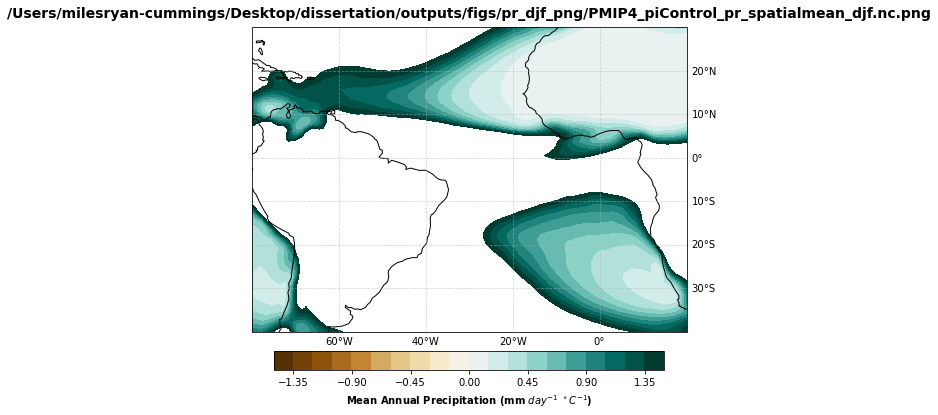

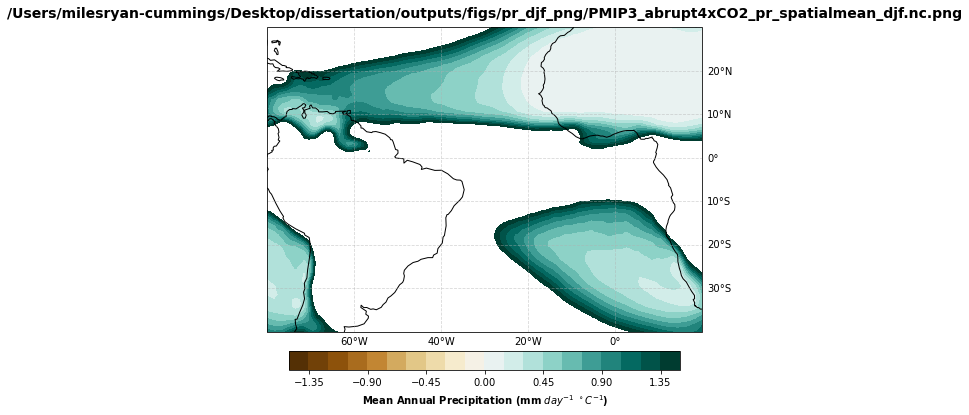

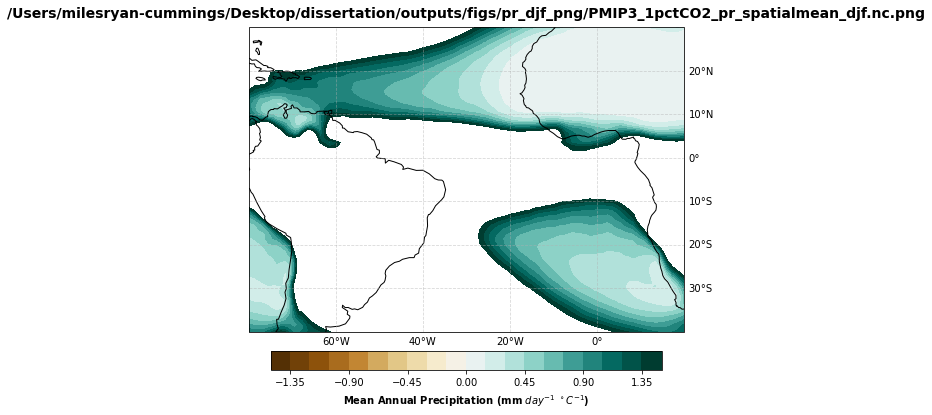

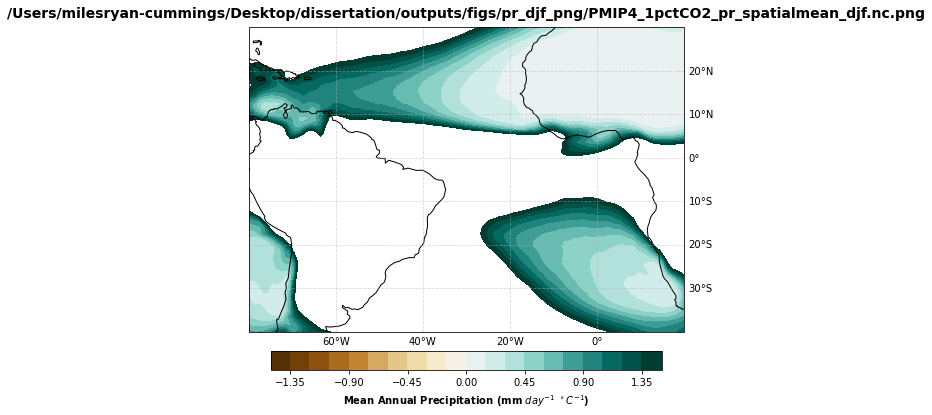

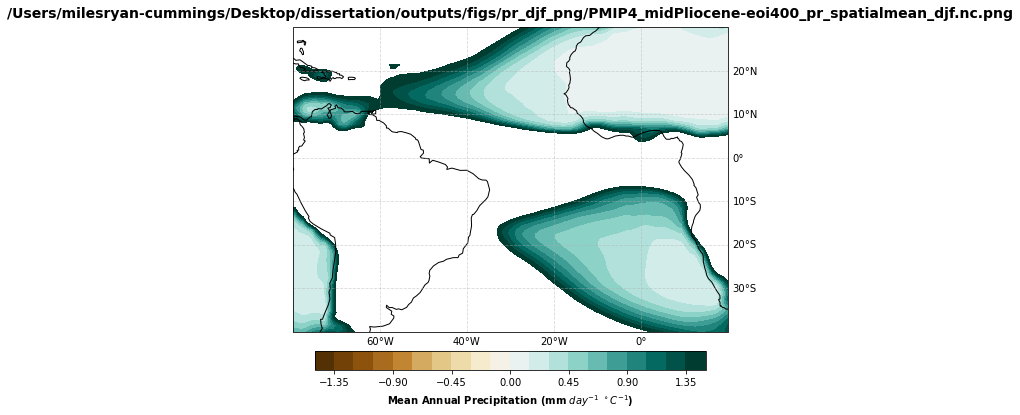

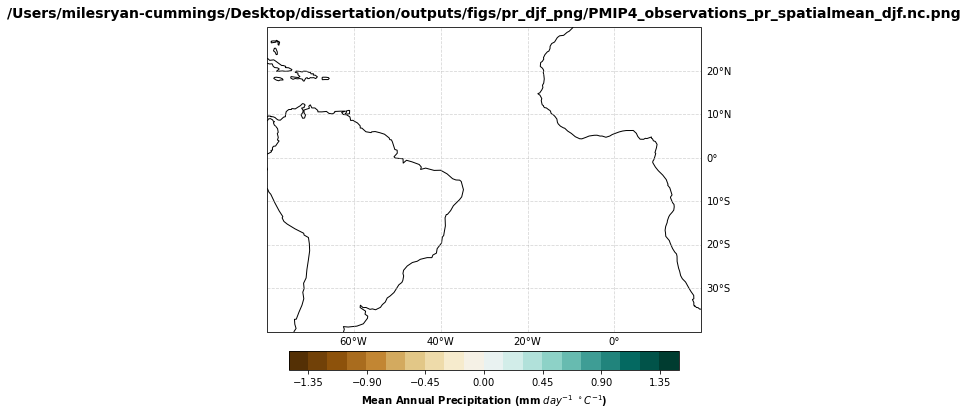

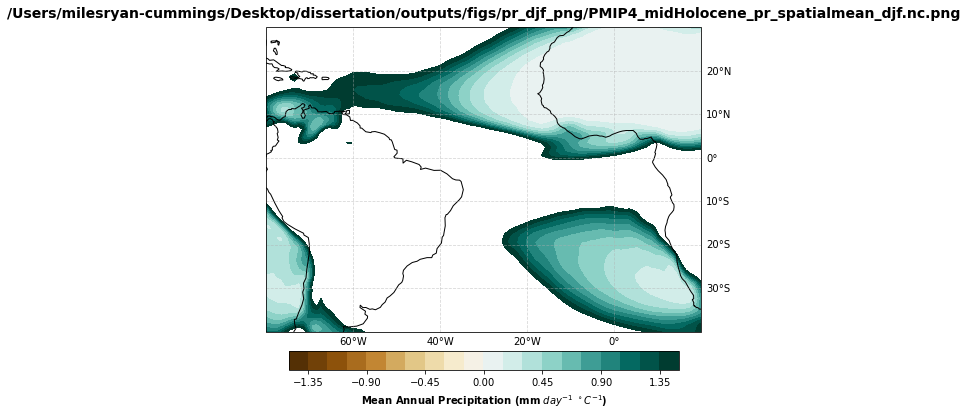

In [6]:
#open datasets
variable_name= 'pr_spatialmean_djf'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_djf/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/pr_djf_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [7]:
#read all diff files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_jja"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_lgm_pr_spatialmean_jja.nc',
 'PMIP4_abrupt4xCO2_pr_spatialmean_jja.nc',
 'PMIP3_piControl_pr_spatialmean_jja.nc',
 'PMIP3_lgm_pr_spatialmean_jja.nc',
 'PMIP4_historical_pr_spatialmean_jja.nc',
 'PMIP4_lig127k_pr_spatialmean_jja.nc',
 'PMIP3_historical_pr_spatialmean_jja.nc',
 'PMIP3_lig127k_pr_spatialmean_jja.nc',
 'PMIP3_midHolocene_pr_spatialmean_jja.nc',
 'PMIP4_piControl_pr_spatialmean_jja.nc',
 'PMIP3_abrupt4xCO2_pr_spatialmean_jja.nc',
 'PMIP3_observations_pr_spatialmean_jja.nc',
 'PMIP3_midPliocene-eoi400_pr_spatialmean_jja.nc',
 'PMIP4_midPliocene-eoi400_pr_spatialmean_jja.nc',
 'PMIP4_1pctCO2_pr_spatialmean_jja.nc',
 'PMIP4_midHolocene_pr_spatialmean_jja.nc',
 'PMIP4_observations_pr_spatialmean_jja.nc',
 'PMIP3_1pctCO2_pr_spatialmean_jja.nc']

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: Use

masked_array(
  data=[[0.25997142, 0.26041293, 0.26087237, ..., 0.25913424, 0.25954861,
         0.25997142],
        [0.28999207, 0.29266711, 0.29537836, ..., 0.28509527, 0.28742781,
         0.28999207],
        [0.32494077, 0.33351042, 0.34221991, ..., 0.30942915, 0.31676587,
         0.32494077],
        ...,
        [1.10164811, 1.09909648, 1.09668554, ..., 1.10367331, 1.1029953 ,
         1.10164811],
        [0.99970849, 0.99885314, 0.99773411, ..., 1.00113364, 1.00039516,
         0.99970849],
        [0.90747238, 0.90753776, 0.90746893, ..., 0.9077913 , 0.90754353,
         0.90747238]],
  mask=False,
  fill_value=1e+20)

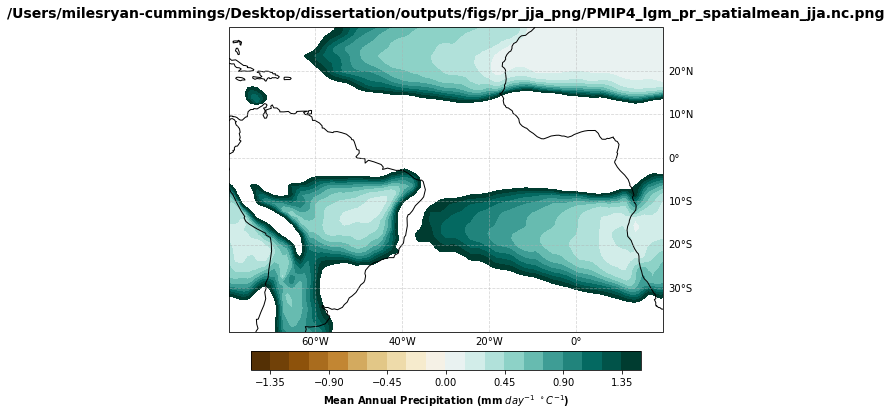

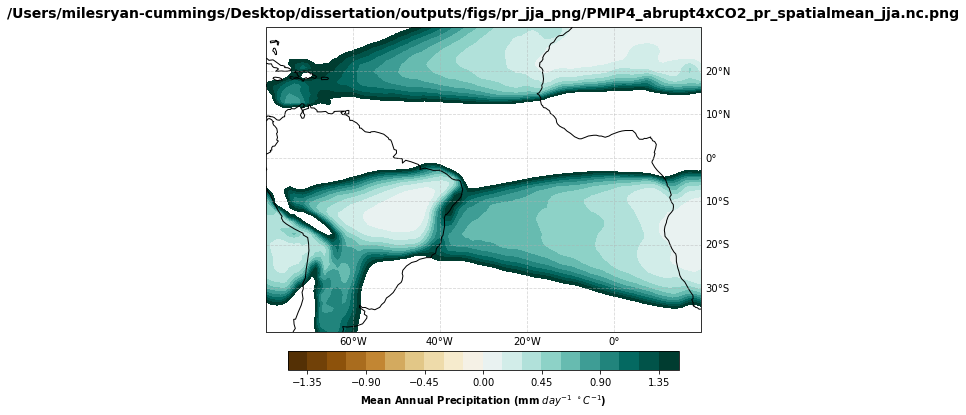

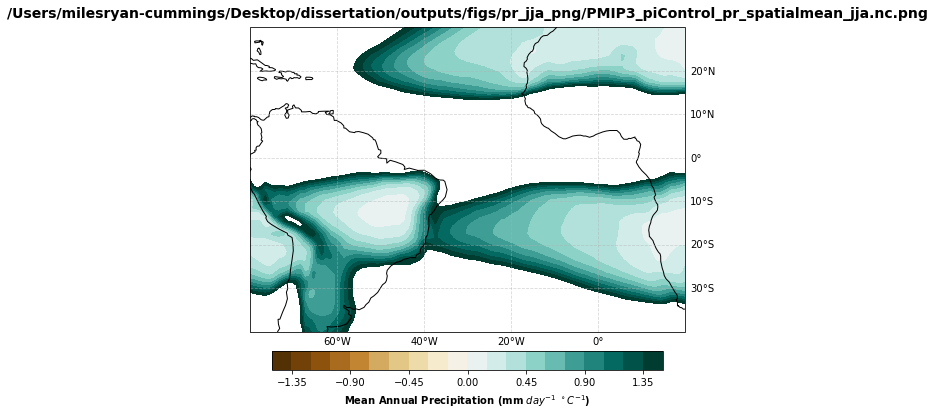

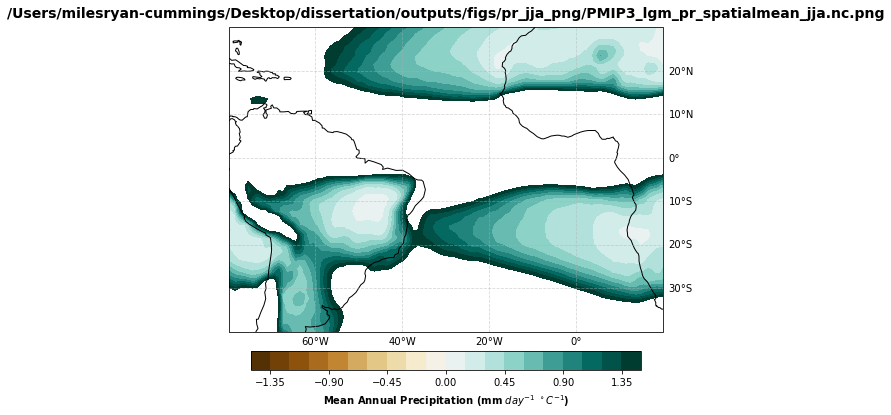

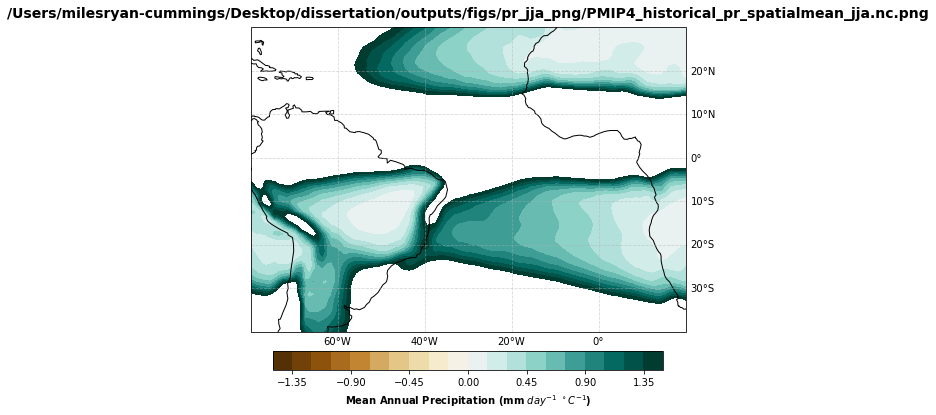

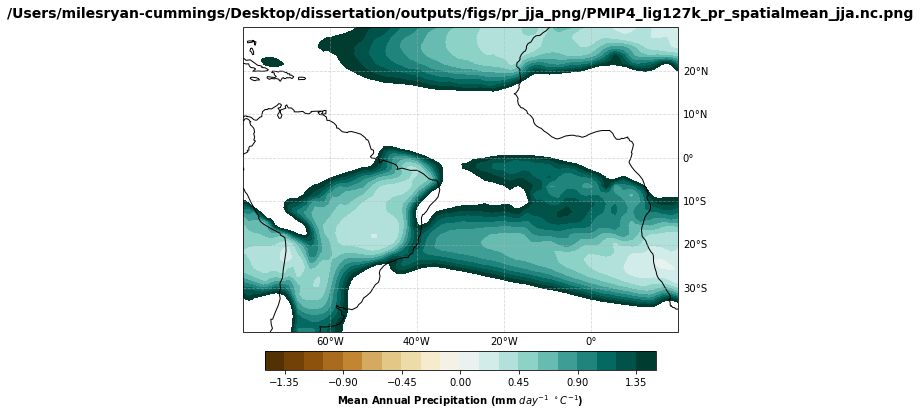

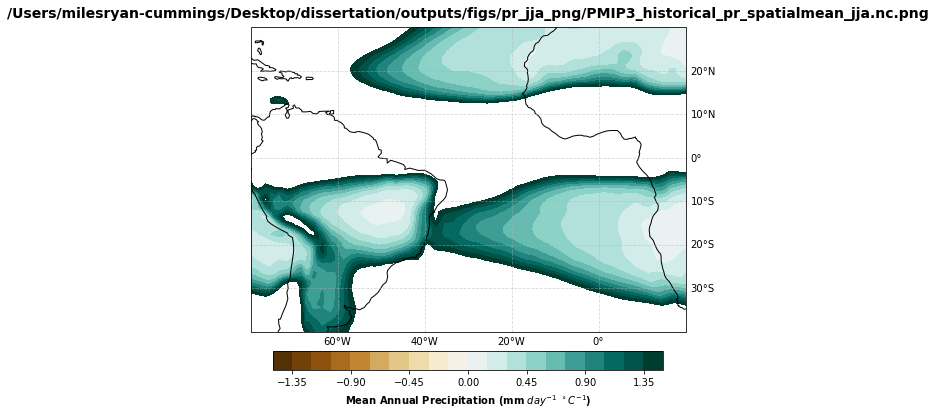

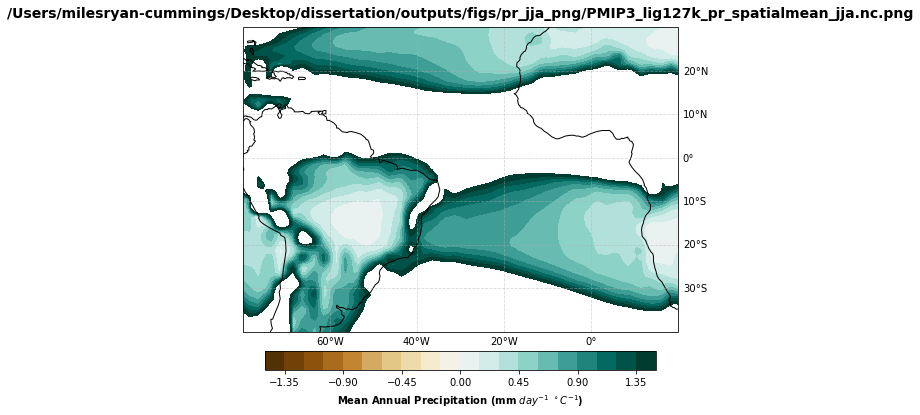

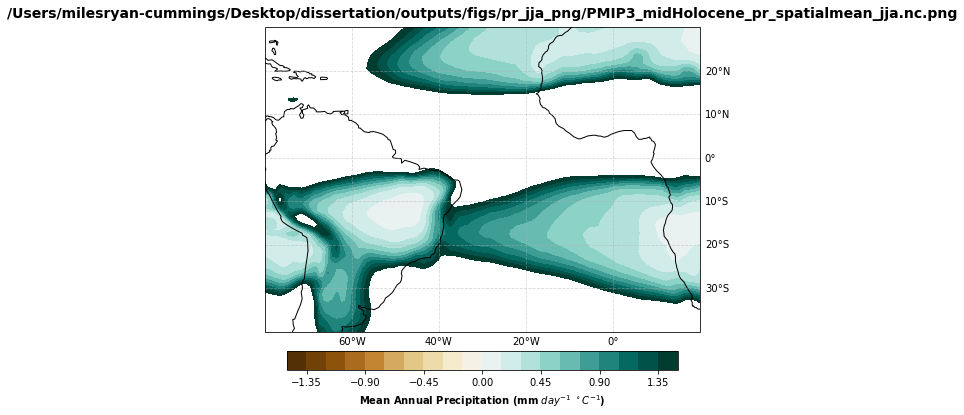

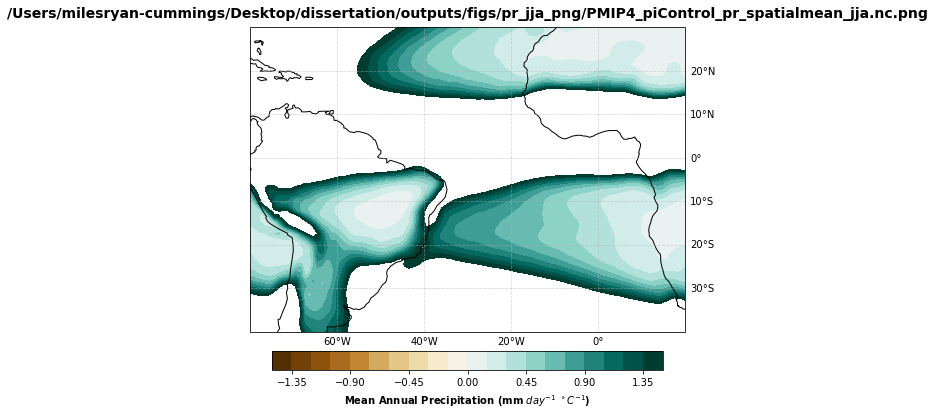

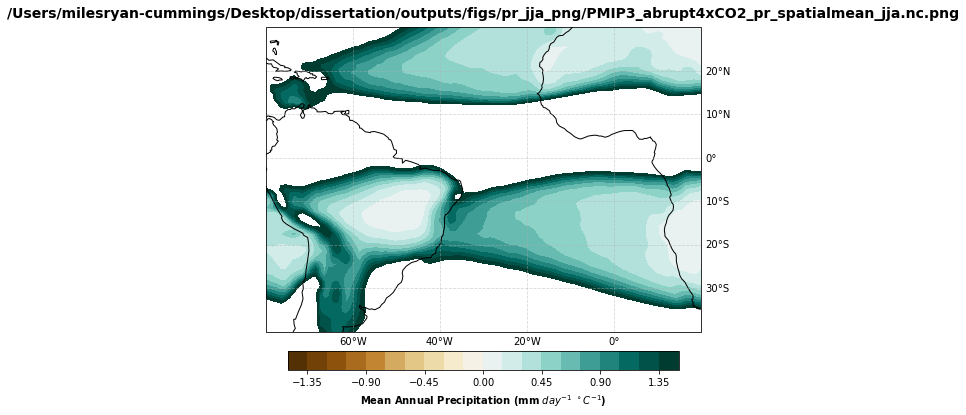

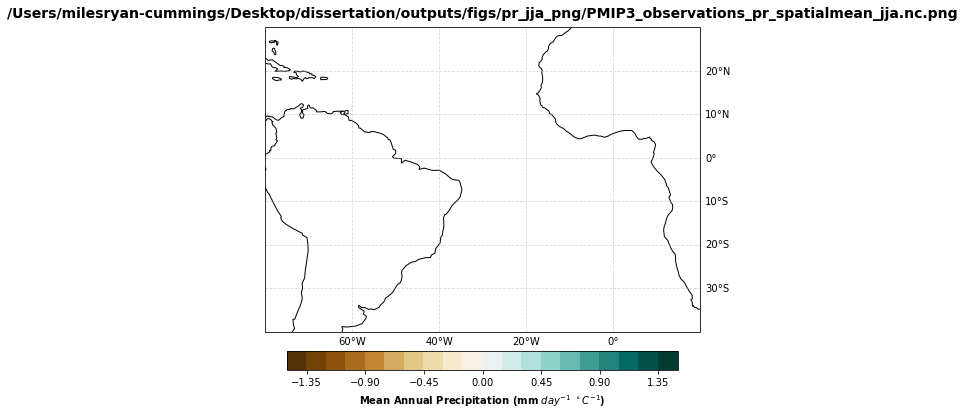

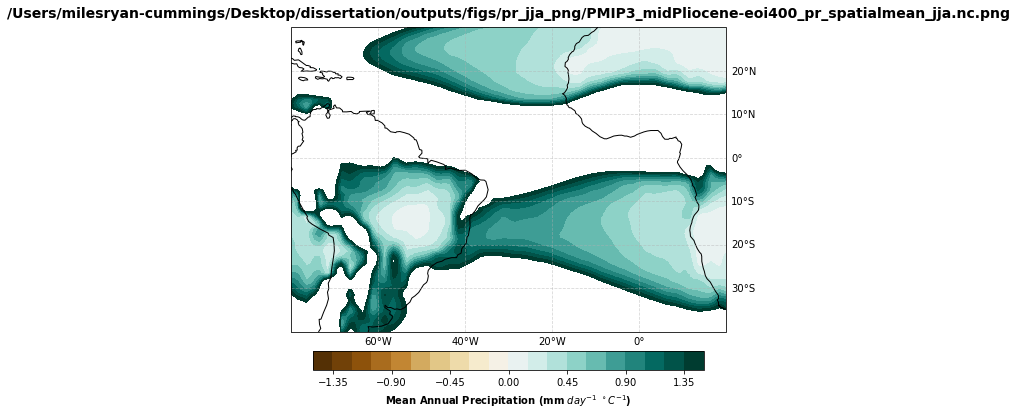

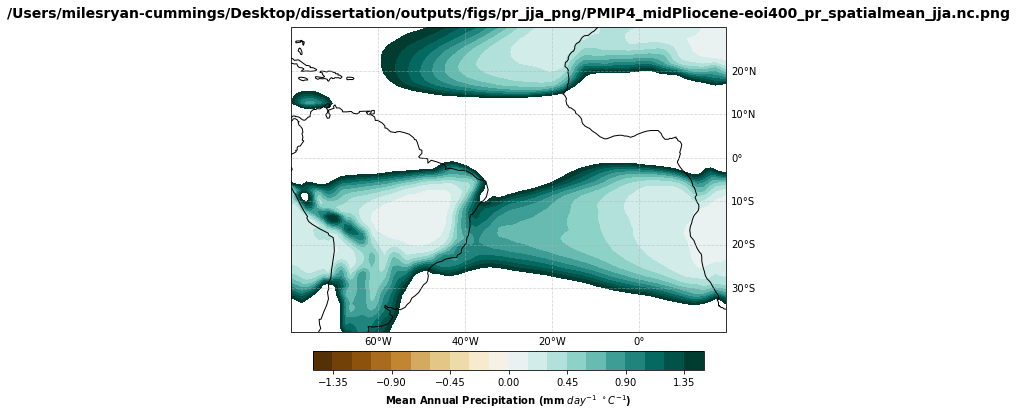

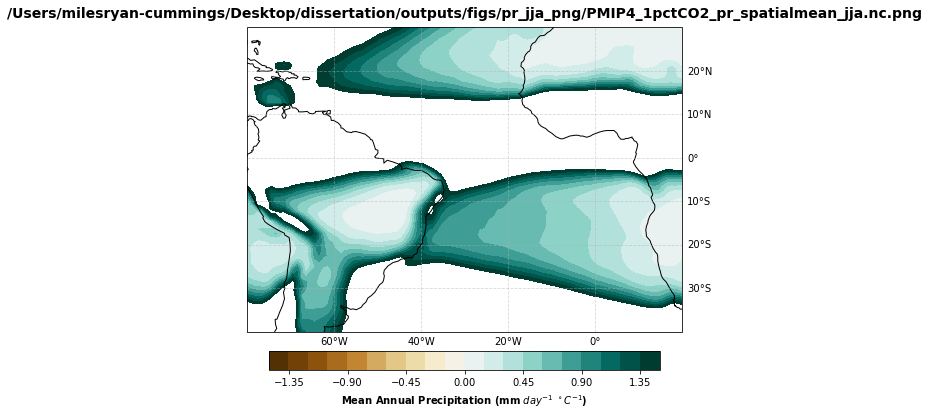

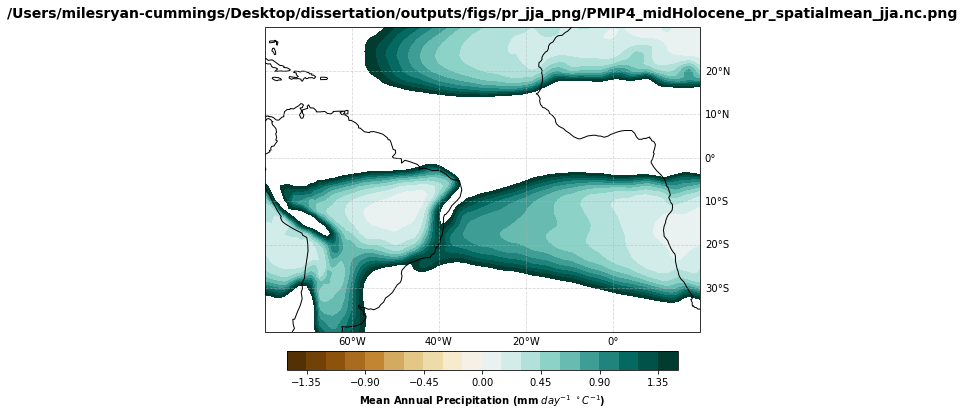

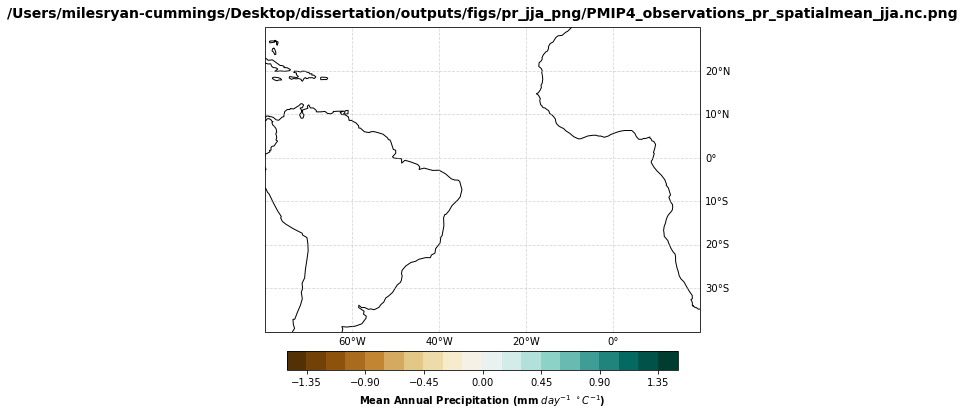

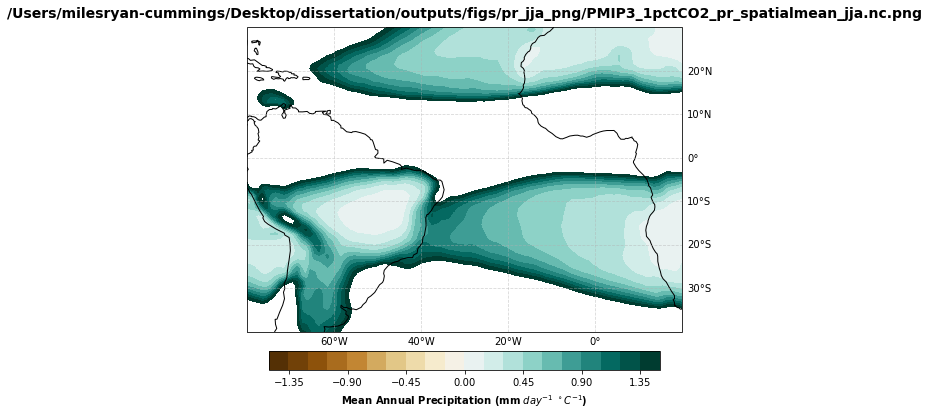

In [8]:
#open datasets
variable_name= 'pr_spatialmean_jja'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_jja/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/pr_jja_png/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot